Freeze Packages in requirement.txt

!pip freeze > requirement.txt





!pip install -r requirement.txt

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,boxcox
from outlier import outlier_detection,multi_outlier
from sklearn.preprocessing import Normalizer,StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


## Data Discripancy

In [6]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [7]:
test.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object

**No discripancies in data types**

### Missing Values

In [8]:
train.isna().sum()/train.shape[0]

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64

In [9]:
test.isna().sum()/test.shape[0]

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
dtype: float64

### Data Quality Check 

In [10]:
train['Gender'].value_counts()/train.shape[0]

Male      0.540761
Female    0.459239
Name: Gender, dtype: float64

In [11]:
test['Gender'].value_counts()/test.shape[0]

Male      0.537135
Female    0.462865
Name: Gender, dtype: float64

In [12]:
train['Driving_License'].value_counts()/train.shape[0]

1    0.997869
0    0.002131
Name: Driving_License, dtype: float64

In [13]:
test['Driving_License'].value_counts()/test.shape[0]

1    0.998134
0    0.001866
Name: Driving_License, dtype: float64

In [14]:
train['Previously_Insured'].value_counts()/train.shape[0]

0    0.54179
1    0.45821
Name: Previously_Insured, dtype: float64

In [15]:
test['Previously_Insured'].value_counts()/test.shape[0]

0    0.539961
1    0.460039
Name: Previously_Insured, dtype: float64

In [16]:
train['Vehicle_Age'].value_counts()/train.shape[0]

1-2 Year     0.525613
< 1 Year     0.432385
> 2 Years    0.042001
Name: Vehicle_Age, dtype: float64

In [17]:
test['Vehicle_Age'].value_counts()/test.shape[0]

1-2 Year     0.525036
< 1 Year     0.433094
> 2 Years    0.041870
Name: Vehicle_Age, dtype: float64

In [18]:
train['Vehicle_Damage'].value_counts()/train.shape[0]

Yes    0.504877
No     0.495123
Name: Vehicle_Damage, dtype: float64

In [19]:
test['Vehicle_Damage'].value_counts()/test.shape[0]

Yes    0.502491
No     0.497509
Name: Vehicle_Damage, dtype: float64

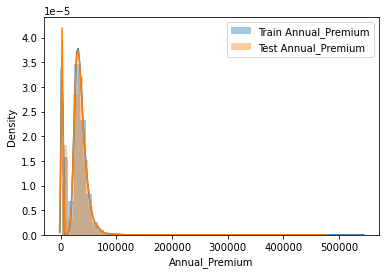

In [20]:
sns.distplot(train['Annual_Premium'],label='Train Annual_Premium')
sns.distplot(test['Annual_Premium'],label='Test Annual_Premium')
plt.legend()

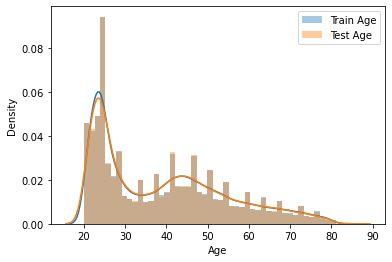

In [21]:
sns.distplot(train['Age'],label='Train Age')
sns.distplot(test['Age'],label='Test Age')
plt.legend()

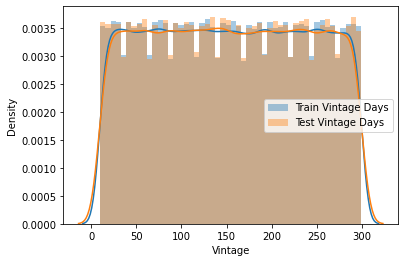

In [22]:
sns.distplot(train['Vintage'],label='Train Vintage Days')
sns.distplot(test['Vintage'],label='Test Vintage Days')
plt.legend()

### Outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x29bbbb0c4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x29bbbb60ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29bbbab03a0>],
 'medians': [<matplotlib.lines.Line2D at 0x29bbbc14670>],
 'fliers': [<matplotlib.lines.Line2D at 0x29bbbc14e50>],
 'means': []}

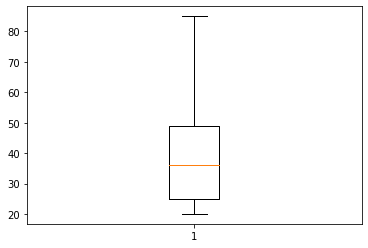

In [23]:
plt.boxplot(train['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29bbaeda250>,
 'caps': [<matplotlib.lines.Line2D at 0x29bb981d910>,
 'boxes': [<matplotlib.lines.Line2D at 0x29bbaeda8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x29bb9b140d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29bb9b1d880>],
 'means': []}

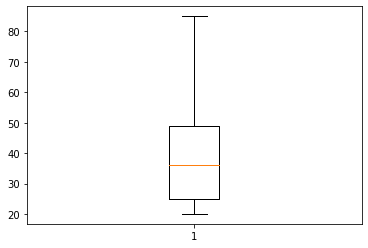

In [24]:
plt.boxplot(test['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29bbc555700>,
 'caps': [<matplotlib.lines.Line2D at 0x29bbc555dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29bbc5553a0>],
 'medians': [<matplotlib.lines.Line2D at 0x29bbc5624c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29bbc562820>],
 'means': []}

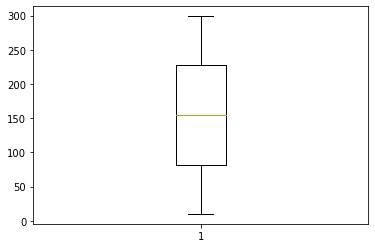

In [25]:
plt.boxplot(train['Vintage'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29bbc5b9220>,
 'caps': [<matplotlib.lines.Line2D at 0x29bbc5b98e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29bbc5a9e80>],
 'medians': [<matplotlib.lines.Line2D at 0x29bbc5b9fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29bbc5c5340>],
 'means': []}

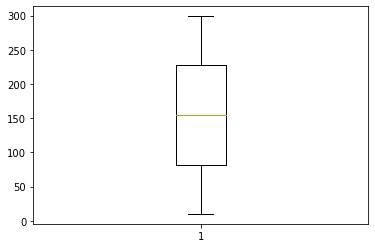

In [26]:
plt.boxplot(test['Vintage'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29bbc610d30>,
 'caps': [<matplotlib.lines.Line2D at 0x29bbc61e430>,
 'boxes': [<matplotlib.lines.Line2D at 0x29bbc6109d0>],
 'medians': [<matplotlib.lines.Line2D at 0x29bbc61eaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29bbc61ee50>],
 'means': []}

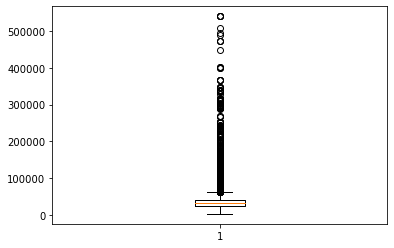

In [27]:
plt.boxplot(train['Annual_Premium'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29bbc678370>,
 'caps': [<matplotlib.lines.Line2D at 0x29bbc678a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x29bbc668fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x29bbc684130>],
 'fliers': [<matplotlib.lines.Line2D at 0x29bbc684490>],
 'means': []}

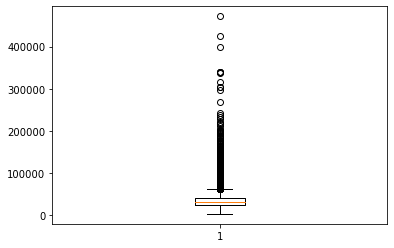

In [28]:
plt.boxplot(test['Annual_Premium'])

In [29]:
outlier_detection(df=train,col='Annual_Premium')

{'whiskers': [<matplotlib.lines.Line2D at 0x29bbc6d7640>,
 'caps': [<matplotlib.lines.Line2D at 0x29bbc6d7d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x29bbc6d72e0>],
 'medians': [<matplotlib.lines.Line2D at 0x29bbc6e2400>],
 'fliers': [<matplotlib.lines.Line2D at 0x29bbc6e2760>],
 'means': []}

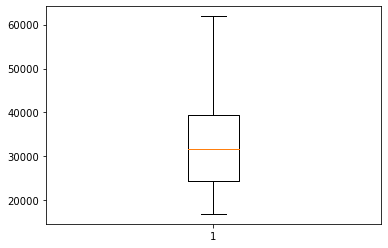

In [30]:
plt.boxplot(train['Annual_Premium'])

In [31]:
outlier_detection(df=test,col='Annual_Premium')

{'whiskers': [<matplotlib.lines.Line2D at 0x29bbc72f850>,
 'caps': [<matplotlib.lines.Line2D at 0x29bbc72ff10>,
 'boxes': [<matplotlib.lines.Line2D at 0x29bbc72f4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x29bbc73e610>],
 'fliers': [<matplotlib.lines.Line2D at 0x29bbc73e970>],
 'means': []}

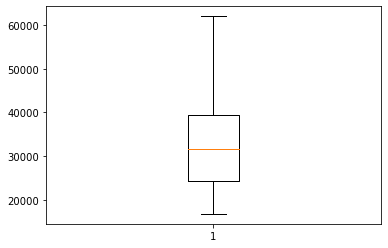

In [32]:
plt.boxplot(test['Annual_Premium'])

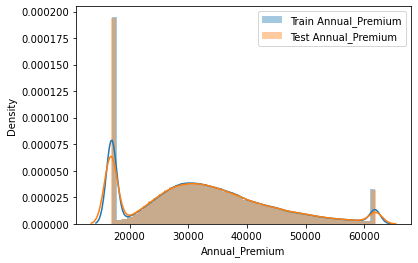

In [33]:
sns.distplot(train['Annual_Premium'],label='Train Annual_Premium')
sns.distplot(test['Annual_Premium'],label='Test Annual_Premium')
plt.legend()

In [34]:
train['Response'].value_counts()/train.shape[0]

0    0.877437
1    0.122563
Name: Response, dtype: float64

## Explore Data

In [35]:
pd.crosstab(train['Gender'],train['Response'],normalize=True).sort_values(by=[1],ascending=False)

Response,0,1
Gender,,
Male,0.465914,0.074847
Female,0.411523,0.047716


In [36]:
pd.crosstab(train['Driving_License'],train['Response'],normalize=True).sort_values(by=[1],ascending=False)

Response,0,1
Driving_License,,
1,0.875414,0.122456
0,0.002023,0.000108


In [37]:
pd.crosstab(train['Previously_Insured'],train['Response'],normalize=True).sort_values(by=[1],ascending=False)

Response,0,1
Previously_Insured,,
0,0.419641,0.122149
1,0.457796,0.000415


In [38]:
pd.crosstab(train['Vehicle_Age'],train['Response'],normalize=True).sort_values(by=[1],ascending=False)

Response,0,1
Vehicle_Age,,
1-2 Year,0.434285,0.091328
< 1 Year,0.413488,0.018897
> 2 Years,0.029663,0.012338


In [39]:
pd.crosstab(train['Vehicle_Damage'],train['Response'],normalize=True).sort_values(by=[1],ascending=False)

Response,0,1
Vehicle_Damage,,
Yes,0.384890,0.119987
No,0.492547,0.002577


In [40]:
pd.crosstab(train['Gender'],train['Response'],values=train['Vintage'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Gender,,
Male,154.128551,154.307555
Female,154.665202,153.805884


In [41]:
pd.crosstab(train['Driving_License'],train['Response'],values=train['Vintage'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Driving_License,,
1,154.375292,154.121258
0,156.522698,143.853659


In [42]:
pd.crosstab(train['Previously_Insured'],train['Response'],values=train['Vintage'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Previously_Insured,,
1,154.576684,156.253165
0,154.165942,154.104979


In [43]:
pd.crosstab(train['Vehicle_Age'],train['Response'],values=train['Vintage'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Vehicle_Age,,
> 2 Years,154.296418,155.286261
1-2 Year,154.129557,154.179021
< 1 Year,154.649552,153.023049


In [44]:
pd.crosstab(train['Vehicle_Damage'],train['Response'],values=train['Vintage'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Vehicle_Damage,,
Yes,154.188179,154.138383
No,154.530328,152.895112


In [45]:
pd.crosstab(train['Gender'],train['Response'],values=train['Annual_Premium'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Gender,,
Male,32610.22613,33694.979720
Female,32232.28201,33615.168628


In [46]:
pd.crosstab(train['Driving_License'],train['Response'],values=train['Annual_Premium'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Driving_License,,
0,36581.781453,35227.463415
1,32423.380496,33662.534273


In [47]:
pd.crosstab(train['Previously_Insured'],train['Response'],values=train['Annual_Premium'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Previously_Insured,,
0,32689.674443,33676.470828
1,32197.656889,29962.455696


In [48]:
pd.crosstab(train['Vehicle_Age'],train['Response'],values=train['Annual_Premium'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Vehicle_Age,,
> 2 Years,36560.379213,39159.552425
1-2 Year,32952.652402,33295.238005
< 1 Year,31591.047032,31857.660164


In [49]:
pd.crosstab(train['Vehicle_Damage'],train['Response'],values=train['Annual_Premium'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Vehicle_Damage,,
Yes,32867.682081,33778.990345
No,32093.270590,28304.956721


In [50]:
pd.crosstab(train['Vehicle_Damage'],train['Response'],values=train['Age'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Vehicle_Damage,,
Yes,42.725282,43.595893
No,34.625031,35.969450


In [51]:
pd.crosstab(train['Vehicle_Age'],train['Response'],values=train['Age'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Vehicle_Age,,
> 2 Years,56.046351,53.069332
1-2 Year,49.761410,45.572344
< 1 Year,24.730594,26.819217


In [52]:
pd.crosstab(train['Previously_Insured'],train['Response'],values=train['Age'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Previously_Insured,,
0,42.162760,43.461828
1,34.525781,35.696203


In [53]:
pd.crosstab(train['Driving_License'],train['Response'],values=train['Age'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Driving_License,,
0,65.952010,59.073171
1,38.114043,43.421822


In [54]:
pd.crosstab(train['Gender'],train['Response'],values=train['Age'],aggfunc='mean').sort_values(by=[1],ascending=False)

Response,0,1
Gender,,
Male,40.373375,44.200526
Female,35.692945,42.235634


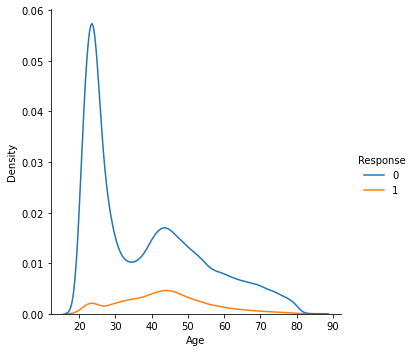

In [55]:
sns.displot(data=train,x='Age',kind='kde',hue='Response')

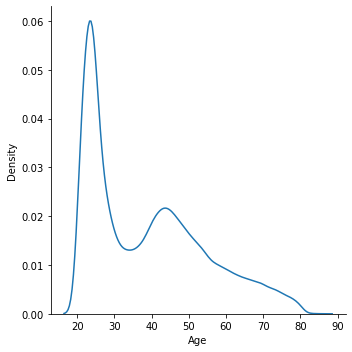

In [56]:
sns.displot(data=train,x='Age',kind='kde')

In [57]:
fitted_data,_=boxcox(train['Age'])
test_fitted_data,_=boxcox(test['Age'])
train.loc[:,'Age']=fitted_data
test.loc[:,'Age']=test_fitted_data

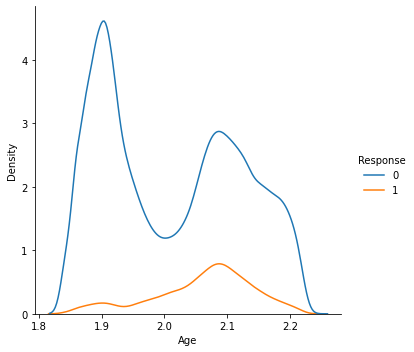

In [58]:
sns.displot(data=train,x='Age',kind='kde',hue='Response')

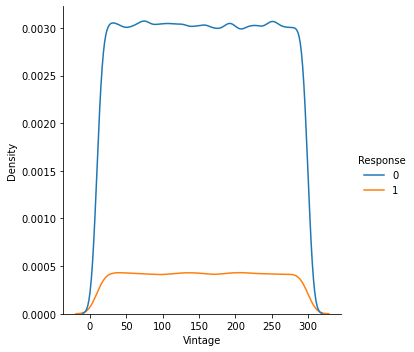

In [59]:
sns.displot(data=train,x='Vintage',kind='kde',hue='Response')

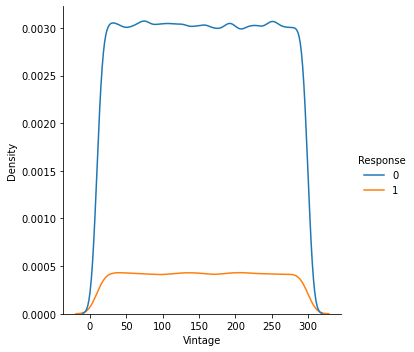

In [60]:
sns.displot(data=train,x='Vintage',kind='kde',hue="Response")

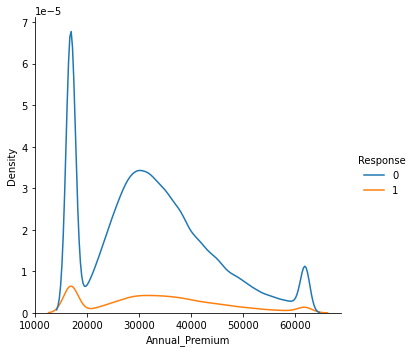

In [61]:
sns.displot(data=train,x='Annual_Premium',kind='kde',hue="Response")

In [62]:
train['Annual_Premium'].skew()

0.541868961955933

In [63]:
fitted_data,_=boxcox(train['Annual_Premium'])

In [64]:
fitted_data,_=boxcox(train['Annual_Premium'])
fitted_data=pd.DataFrame(fitted_data)

In [65]:
test_fitted_data,_=boxcox(test['Annual_Premium'])
train.loc[:,'Annual_Premium']=np.asarray(fitted_data)
test.loc[:,'Annual_Premium']=np.asarray(test_fitted_data)

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

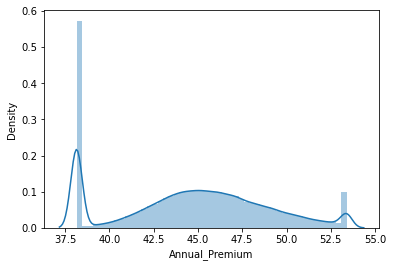

In [66]:
sns.distplot(train['Annual_Premium'])

In [67]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,2.080704,1,28.0,0,> 2 Years,Yes,47.874509,26.0,217,1
1,2,Male,2.210159,1,3.0,0,1-2 Year,No,45.610646,26.0,183,0
2,3,Male,2.097693,1,28.0,0,> 2 Years,Yes,47.201707,26.0,27,1
3,4,Male,1.860233,1,11.0,1,< 1 Year,No,43.773721,152.0,203,0
4,5,Female,1.963597,1,41.0,1,< 1 Year,No,43.320741,152.0,39,0


<AxesSubplot:xlabel='Driving_License', ylabel='Age'>

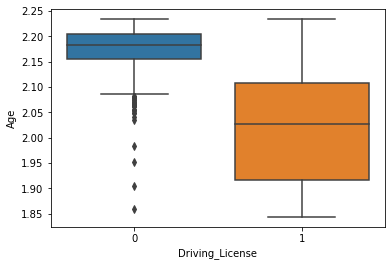

In [68]:
sns.boxplot(x=train['Driving_License'],y=train['Age'])

In [70]:
train=multi_outlier(condition=0,df=train,on_Col='Driving_License',out_Col='Age')

<AxesSubplot:xlabel='Driving_License', ylabel='Age'>

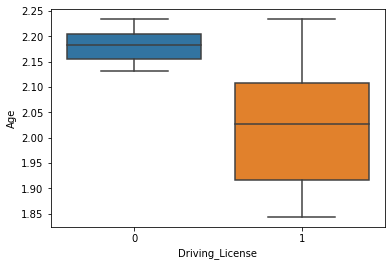

In [71]:
sns.boxplot(x=train['Driving_License'],y=train['Age'])

<AxesSubplot:xlabel='Vehicle_Age', ylabel='Age'>

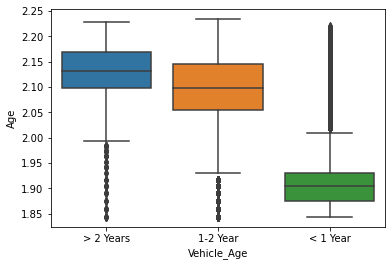

In [73]:
sns.boxplot(x=train['Vehicle_Age'],y=train['Age'])

In [74]:
train=train=multi_outlier(condition='> 2 Years',df=train,on_Col='Vehicle_Age',out_Col='Age')

<AxesSubplot:xlabel='Vehicle_Age', ylabel='Age'>

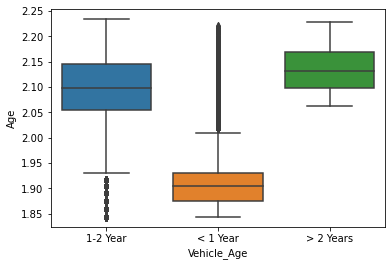

In [75]:
sns.boxplot(x=train['Vehicle_Age'],y=train['Age'])

In [76]:
train=train=multi_outlier(condition='1-2 Year',df=train,on_Col='Vehicle_Age',out_Col='Age')
train=train=multi_outlier(condition='< 1 Year',df=train,on_Col='Vehicle_Age',out_Col='Age')

<AxesSubplot:xlabel='Vehicle_Age', ylabel='Age'>

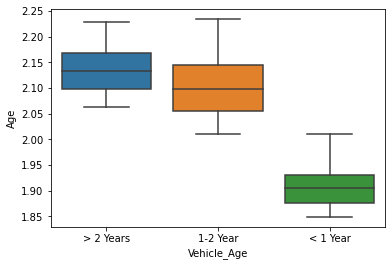

In [77]:
sns.boxplot(x=train['Vehicle_Age'],y=train['Age'])

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='Age'>

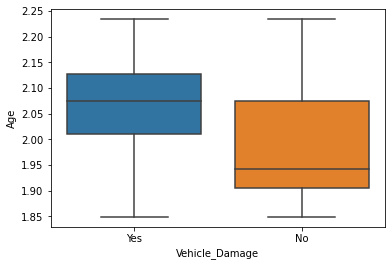

In [78]:
sns.boxplot(x=train['Vehicle_Damage'],y=train['Age'])

<AxesSubplot:xlabel='Gender', ylabel='Annual_Premium'>

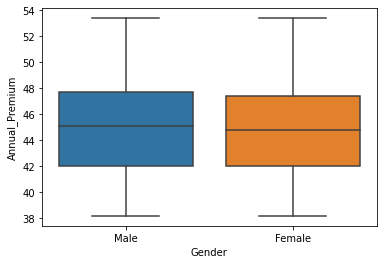

In [79]:
sns.boxplot(x=train['Gender'],y=train['Annual_Premium'])

<AxesSubplot:xlabel='Driving_License', ylabel='Annual_Premium'>

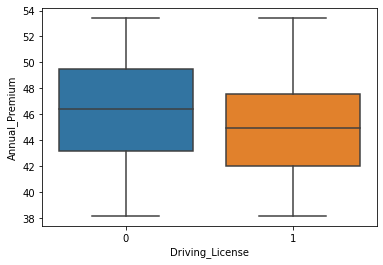

In [80]:
sns.boxplot(x=train['Driving_License'],y=train['Annual_Premium'])

<AxesSubplot:xlabel='Vehicle_Age', ylabel='Annual_Premium'>

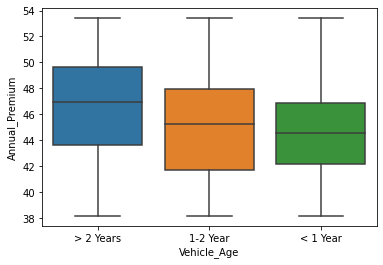

In [81]:
sns.boxplot(x=train['Vehicle_Age'],y=train['Annual_Premium'])

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='Annual_Premium'>

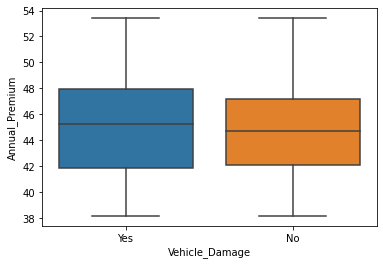

In [82]:
sns.boxplot(x=train['Vehicle_Damage'],y=train['Annual_Premium'])

<AxesSubplot:xlabel='Gender', ylabel='Vintage'>

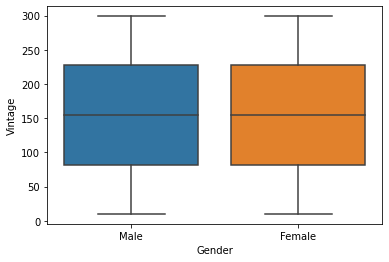

In [83]:
sns.boxplot(x=train['Gender'],y=train['Vintage'])

<AxesSubplot:xlabel='Driving_License', ylabel='Vintage'>

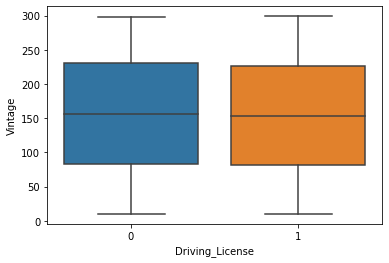

In [84]:
sns.boxplot(x=train['Driving_License'],y=train['Vintage'])

<AxesSubplot:xlabel='Vehicle_Age', ylabel='Vintage'>

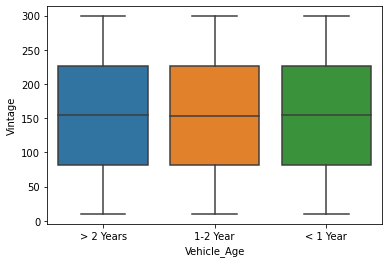

In [85]:
sns.boxplot(x=train['Vehicle_Age'],y=train['Vintage'])

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='Vintage'>

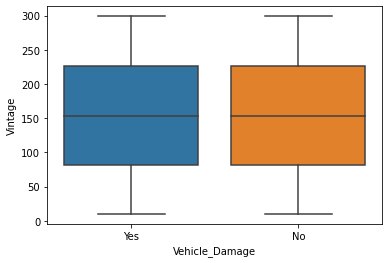

In [86]:
sns.boxplot(x=train['Vehicle_Damage'],y=train['Vintage'])

## Feature Extraction

In [91]:
train['is_Train']=1
test['is_Train']=0

In [92]:
cl_data=pd.concat([train,test],axis=0)

In [112]:
train['Vehicle_Damage'].replace({'Yes':1,'No':0},inplace=True)
test['Vehicle_Damage'].replace({'Yes':1,'No':0},inplace=True)

In [106]:
cl_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,is_Train,Region_Total_PInsured_d,Region_Avg_Premium_d
0,1,Male,2.080704,1,28.0,0,> 2 Years,1,47.874509,26.0,217,1.0,1,44166,47.516796
2,3,Male,2.097693,1,28.0,0,> 2 Years,1,47.201707,26.0,27,1.0,1,44166,47.516796
62,63,Female,2.164847,1,28.0,0,> 2 Years,1,45.713790,26.0,130,0.0,1,44166,47.516796
86,87,Female,2.132179,1,47.0,0,> 2 Years,1,45.375486,26.0,248,0.0,1,4196,45.153690
97,98,Female,2.164847,1,28.0,0,> 2 Years,1,48.307364,155.0,114,0.0,1,44166,47.516796


In [113]:
region_Previously_insured=train.groupby('Region_Code')['Previously_Insured'].agg('sum').to_dict()
t_region_Previously_insured=test.groupby('Region_Code')['Previously_Insured'].agg('sum').to_dict()
train['Region_Total_PInsured_d']=train['Region_Code'].map(region_Previously_insured)
test['Region_Total_PInsured_d']=test['Region_Code'].map(t_region_Previously_insured)
train['Region_Total_PInsured_d']/=train.shape[0]
test['Region_Total_PInsured_d']/=test.shape[0]
region_avg_ap=train.groupby('Region_Code')['Annual_Premium'].agg('mean').to_dict()
t_region_avg_ap=test.groupby('Region_Code')['Annual_Premium'].agg('mean').to_dict()
train['Region_Avg_Premium_d']=train['Region_Code'].map(region_avg_ap)
test['Region_Avg_Premium_d']=test['Region_Code'].map(t_region_avg_ap)
region_with_dl=train.groupby('Region_Code')['Driving_License'].agg('sum').to_dict()
t_region_with_dl=test.groupby('Region_Code')['Driving_License'].agg('sum').to_dict()
train['Region_With_DL_d']=train['Region_Code'].map(region_with_dl)
test['Region_With_DL_d']=test['Region_Code'].map(t_region_with_dl)
train['Region_With_DL_d']/=train.shape[0]
test['Region_With_DL_d']/=test.shape[0]
region_damaged_vehicle=train.groupby('Region_Code')['Vehicle_Damage'].agg('sum').to_dict()
t_region_damaged_vehicle=test.groupby('Region_Code')['Vehicle_Damage'].agg('sum').to_dict()
train['Region_Total_Damaged_Vehicle_d']=train['Region_Code'].map(region_damaged_vehicle)
test['Region_Total_Damaged_Vehicle_d']=test['Region_Code'].map(t_region_damaged_vehicle)
train['Region_Total_Damaged_Vehicle_d']/=train.shape[0]
test['Region_Total_Damaged_Vehicle_d']/=test.shape[0]
region_avg_age=train.groupby('Region_Code')['Age'].agg('mean')
t_region_avg_age=test.groupby('Region_Code')['Age'].agg('mean')
train['Region_Avg_Age_d']=train['Region_Code'].map(region_avg_age)
test['Region_Avg_Age_d']=test['Region_Code'].map(t_region_avg_age)

In [123]:
channel_Previously_insured=train.groupby('Policy_Sales_Channel')['Previously_Insured'].agg('sum').to_dict()
t_channel_Previously_insured=test.groupby('Policy_Sales_Channel')['Previously_Insured'].agg('sum').to_dict()
train['Channel_Total_PInsured_d']=train['Policy_Sales_Channel'].map(channel_Previously_insured)
test['Channel_Total_PInsured_d']=test['Policy_Sales_Channel'].map(t_channel_Previously_insured)
train['Channel_Total_PInsured_d']/=train.shape[0]
test['Channel_Total_PInsured_d']/=test.shape[0]
channel_avg_ap=train.groupby('Policy_Sales_Channel')['Annual_Premium'].agg('mean').to_dict()
t_channel_avg_ap=test.groupby('Policy_Sales_Channel')['Annual_Premium'].agg('mean').to_dict()
train['Channel_Avg_Premium_d']=train['Policy_Sales_Channel'].map(channel_avg_ap)
test['Channel_Avg_Premium_d']=test['Policy_Sales_Channel'].map(t_channel_avg_ap)
channel_with_dl=train.groupby('Policy_Sales_Channel')['Driving_License'].agg('sum').to_dict()
t_channel_with_dl=test.groupby('Policy_Sales_Channel')['Driving_License'].agg('sum').to_dict()
train['Channel_With_DL_d']=train['Policy_Sales_Channel'].map(channel_with_dl)
test['Channel_With_DL_d']=test['Policy_Sales_Channel'].map(t_channel_with_dl)
train['Channel_With_DL_d']/=train.shape[0]
test['Channel_With_DL_d']/=test.shape[0]
channel_damaged_vehicle=train.groupby('Policy_Sales_Channel')['Vehicle_Damage'].agg('sum').to_dict()
t_channel_damaged_vehicle=test.groupby('Policy_Sales_Channel')['Vehicle_Damage'].agg('sum').to_dict()
train['Channel_Total_Damaged_Vehicle_d']=train['Policy_Sales_Channel'].map(channel_damaged_vehicle)
test['Channel_Total_Damaged_Vehicle_d']=test['Policy_Sales_Channel'].map(t_channel_damaged_vehicle)
train['Channel_Total_Damaged_Vehicle_d']/=train.shape[0]
test['Channel_Total_Damaged_Vehicle_d']/=test.shape[0]
channel_avg_age=train.groupby('Policy_Sales_Channel')['Age'].agg('mean')
t_channel_avg_age=test.groupby('Policy_Sales_Channel')['Age'].agg('mean')
train['Channel_Avg_Age_d']=train['Policy_Sales_Channel'].map(channel_avg_age)
test['Channel_Avg_Age_d']=test['Policy_Sales_Channel'].map(t_channel_avg_age)

In [124]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,...,Region_Total_PInsured_d,Region_Avg_Premium_d,Region_With_DL_d,Region_Total_Damaged_Vehicle_d,Region_Avg_Age_d,Channel_Total_PInsured_d,Channel_Avg_Premium_d,Channel_With_DL_d,Channel_Total_Damaged_Vehicle_d,Channel_Avg_Age_d
0,1,Male,2.080704,1,28.0,0,> 2 Years,1,47.874509,26.0,...,0.087067,46.914666,0.278298,0.184294,2.076913,0.063457,45.593793,0.208061,0.140936,2.105655
2,3,Male,2.097693,1,28.0,0,> 2 Years,1,47.201707,26.0,...,0.087067,46.914666,0.278298,0.184294,2.076913,0.063457,45.593793,0.208061,0.140936,2.105655
62,63,Female,2.164847,1,28.0,0,> 2 Years,1,45.713790,26.0,...,0.087067,46.914666,0.278298,0.184294,2.076913,0.063457,45.593793,0.208061,0.140936,2.105655
86,87,Female,2.132179,1,47.0,0,> 2 Years,1,45.375486,26.0,...,0.008176,44.606183,0.019475,0.010068,1.987950,0.063457,45.593793,0.208061,0.140936,2.105655
97,98,Female,2.164847,1,28.0,0,> 2 Years,1,48.307364,155.0,...,0.087067,46.914666,0.278298,0.184294,2.076913,0.000472,44.494559,0.003233,0.002634,2.066145


In [127]:
train.drop(['is_Train','Region_Code','Policy_Sales_Channel'],axis=1,inplace=True)
test.drop(['is_Train','Region_Code','Policy_Sales_Channel'],axis=1,inplace=True)

In [128]:
train.shape,test.shape

((381109, 20), (127037, 19))